<a href="https://colab.research.google.com/github/soyoonjeong/Dacon/blob/main/%EC%87%BC%ED%95%91%EB%AA%B0_%EC%A7%80%EC%A0%90%EB%B3%84_%EB%A7%A4%EC%B6%9C%EC%95%A1_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. train.csv : 학습 데이터<br>
id : 샘플 아이디<br>
Store : 쇼핑몰 지점<br>
Date : 주 단위(Weekly) 날짜<br>
Temperature : 해당 쇼핑몰 주변 기온<br>
Fuel_Price : 해당 쇼핑몰 주변 연료 가격<br>
Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보<br>
Unemployment : 해당 쇼핑몰 지역의 실업률<br>
IsHoliday : 해당 기간의 공휴일 포함 여부<br>
Weekly_Sales : 주간 매출액 (목표 예측값)<br>


2. test.csv : 테스트 데이터<br>
id : 샘플 아이디<br>
Store : 쇼핑몰 지점<br>
Date : 주 단위(Weekly) 날짜<br>
Temperature : 해당 쇼핑몰 주변 기온<br>
Fuel_Price : 해당 쇼핑몰 주변 연료 가격<br>
Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보<br>
Unemployment : 해당 쇼핑몰 지역의 실업률<br>
IsHoliday : 해당 기간의 공휴일 포함 여부<br>


3. sample_submission.csv : 제출 양식<br>
id : 샘플 아이디<br>
Weekly_Sales : 주간 매출액 (목표 예측값)<br>


# 데이터 살펴보기

## 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/content/drive/MyDrive/datasets/쇼핑몰 지점별 매출액 예측/train.csv")
test = pd.read_csv("/content/drive/MyDrive/datasets/쇼핑몰 지점별 매출액 예측/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/datasets/쇼핑몰 지점별 매출액 예측/sample_submission.csv")

In [ ]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


## 데이터 확인

In [ ]:
train.tail()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20
6254,6255,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,8.684,False,713173.95


In [ ]:
train.info() # 6255개의 행, 13개의 열 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


- Non-Null Count를 보니 promotion 열들에 결측치 많음
- Date, IsHoliday 부분은 숫자가 아님 

In [ ]:
train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


promotion 칼럼들은 많은 0 값을 가지고 있고 극단적인 수치를 가진 이상치들을 가지고 있음 

## 데이터 시각화

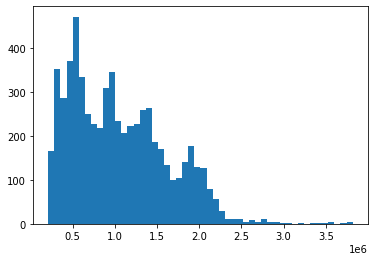

In [ ]:
plt.hist(train.Weekly_Sales, bins = 50)
plt.show()

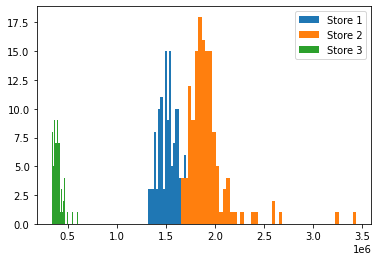

In [ ]:
plt.hist(train[train.Store==1].Weekly_Sales, bins = 50)
plt.hist(train[train.Store==2].Weekly_Sales, bins = 50)
plt.hist(train[train.Store==3].Weekly_Sales, bins = 50)
plt.legend(['Store 1','Store 2','Store 3'])
plt.show()

지점별로 명확한 차이

# 데이터 전처리

## 결측치 처리 

In [3]:
train = train.fillna(0)
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


## Date 전처리
월 정보만 사용 

In [ ]:
def get_month(date):
  return int(date[3:5])

train['Month'] = train['Date'].apply(get_month)

In [ ]:
def holiday_to_number(isholiday):
  if isholiday==True:
    return 1
  return 0 

train['NumberHoliday'] = train['IsHoliday'].apply(holiday_to_number)

In [ ]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,NumberHoliday
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,0
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,1
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,0
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,0
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,0
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,1
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,0
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,0


In [ ]:
test = test.fillna(0)
test['Month'] = test['Date'].apply(get_month)
test['NumberHoliday'] = test['IsHoliday'].apply(holiday_to_number)

In [4]:
def date_encoder(data):
  day, month, year = map(int, data.split('/'))
  return day, month, year

train['Day'] = train['Date'].apply(lambda x: date_encoder(x)[0])
train['Month'] = train['Date'].apply(lambda x: date_encoder(x)[1])
train['Year'] = train['Date'].apply(lambda x: date_encoder(x)[2])

In [ ]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,5,2,2010
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,12,2,2010
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,19,2,2010
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,26,2,2010
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,8,2012
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,7,9,2012
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,14,9,2012
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,9,2012


In [5]:
train = train.drop(columns = ['Day','Date'])
train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Year
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,2010
1,2,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,2010
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,2010
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,2010
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,2012
6251,6252,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,2012
6252,6253,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,2012
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,2012


## promotion scaling

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 분포 학습 (평균 빼고 분산으로 나눔)
scaler.fit(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])
# 분포 적용 
scaled = scaler.transform(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

train[['Scaled_Promotion1','Scaled_Promotion2','Scaled_Promotion3','Scaled_Promotion4','Scaled_Promotion5']] = scaled

In [ ]:
train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
1,2,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,2012,3.580831,-0.168998,-0.065037,1.574261,0.598779
6251,6252,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,2012,1.453422,-0.167623,-0.072573,0.222921,0.128229
6252,6253,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,2012,1.518086,-0.170211,-0.081610,0.635401,0.909037
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,2012,1.019698,-0.151556,-0.070589,0.360229,1.735591


In [7]:
train = train.drop(columns = ['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

In [8]:
test = test.fillna(0)
test['Month'] = test['Date'].apply(lambda x : date_encoder(x)[1])
test['Year'] = test['Date'].apply(lambda x : date_encoder(x)[2])
test = test.drop(columns = ['Date'])
# 분포 적용 
scaled = scaler.transform(test[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])
test[['Scaled_Promotion1','Scaled_Promotion2','Scaled_Promotion3','Scaled_Promotion4','Scaled_Promotion5']] = scaled
test = test.drop(columns = ['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

# 모델 선택 
: 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
train = train.drop(columns = ['id'])
test = test.drop(columns = ['id'])
train = train.drop(columns = ['Date','NumberHoliday'])
test = test.drop(columns = ['Date','NumberHoliday'])
x_train = train.drop(columns = ['Weekly_Sales'])
Y_train = train['Weekly_Sales']

In [ ]:
model.fit(x_train, Y_train)

LinearRegression()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         180 non-null    int64  
 1   Temperature   180 non-null    float64
 2   Fuel_Price    180 non-null    float64
 3   Promotion1    178 non-null    float64
 4   Promotion2    45 non-null     float64
 5   Promotion3    161 non-null    float64
 6   Promotion4    146 non-null    float64
 7   Promotion5    180 non-null    float64
 8   Unemployment  180 non-null    float64
 9   IsHoliday     180 non-null    bool   
 10  Month         180 non-null    int64  
dtypes: bool(1), float64(8), int64(2)
memory usage: 14.4 KB


In [ ]:
prediction = model.predict(test)
print("************예측된 데이터의 상위 10개의 값 확인******************")
print(prediction[:10])

************예측된 데이터의 상위 10개의 값 확인******************
[1481332.55782774 1461330.08031011 1387783.09207984 1389854.53005948
 1443978.94274372 1514601.15440919 1416193.17838576 1439121.7459541
 1334090.21769005 1324831.19678272]


In [ ]:
sample_submission['Weekly_Sales'] = prediction
sample_submission.head()

,id,Weekly_Sales
0,1,1.481333e+06
1,2,1.461330e+06
2,3,1.387783e+06
3,4,1.389855e+06
4,5,1.443979e+06


In [ ]:
sample_submission.to_csv("/content/drive/MyDrive/datasets/쇼핑몰 지점별 매출액 예측/submission.csv", encoding = 'utf-8')

: 랜덤포레스트

In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [10]:
train = train.drop(columns = ['id'])
test = test.drop(columns = ['id'])

x_train = train.drop(columns = ['Weekly_Sales'])
y_train = train['Weekly_Sales']

In [11]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [13]:
prediction = model.predict(test)
print("--------------------예측된 데이터의 상위 10개의 값 확인-----------------")
print(prediction[:10])

--------------------예측된 데이터의 상위 10개의 값 확인-----------------
[1628642.2743 1559757.4151 1485073.1617 1472680.5212 1817907.3808
 1789414.7034 1718110.8742 1735024.8015  424962.4095  417381.0831]


In [14]:
sample_submission['Weekly_Sales'] = prediction
sample_submission.head()

,id,Weekly_Sales
0,1,1.628642e+06
1,2,1.559757e+06
2,3,1.485073e+06
3,4,1.472681e+06
4,5,1.817907e+06


In [15]:
sample_submission.to_csv("/content/drive/MyDrive/datasets/쇼핑몰 지점별 매출액 예측/submission2.csv", index = False)